In [29]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [30]:
sf = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [31]:
sf_bins = np.arange(0, 700000, 25000)
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

107219.48

Population Median =  107219.48
Sample Median =  104316.28


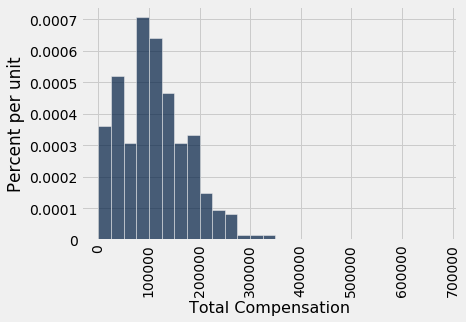

In [32]:
our_sample = sf.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)

## Bootstrap

Population Median =  107219.48
Our Sample Median =  104316.28
Bootstrap Sample Median =  104601.37


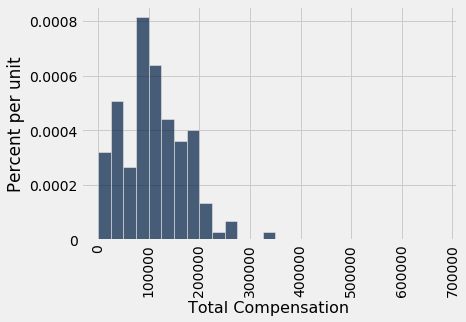

In [33]:
# One bootstrap resample
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Our Sample Median = ", our_sample_median)
print("Bootstrap Sample Median = ", percentile(50,boot_sample.column('Total Compensation')))

In [34]:
### Simulate the distribution of the bootstrap sample median
### bootstrap sample : sample :: sample : population

### NOTE: this whole simulation only uses our_sample, we never need to look at sf

def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

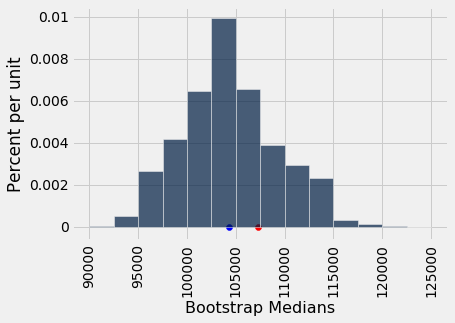

In [35]:
Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=np.arange(90000, 125001, 2500))
plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");

### Bootstrap Confidence Interval

left: 95581.78
right: 114132.89


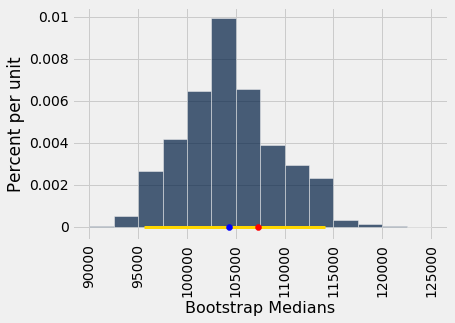

In [36]:
### Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
print("left:", left)
print("right:", right)
Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=np.arange(90000, 125001, 2500))
plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

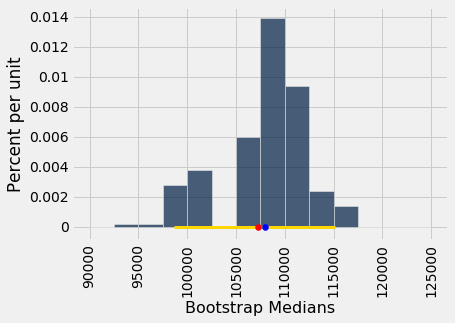

In [37]:
## Now do the whole process: 
## 1. take a sample, 
## 2. use it to make many bootstrap samples,
## 3. use the middle 95% of the bootstrap medians as our confidence interval

our_sample = sf.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))

bootstrap_medians = make_array()
for i in np.arange(201):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=np.arange(90000, 125001, 2500))
plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

## Bootstrap Mean Maternal Age

In [15]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


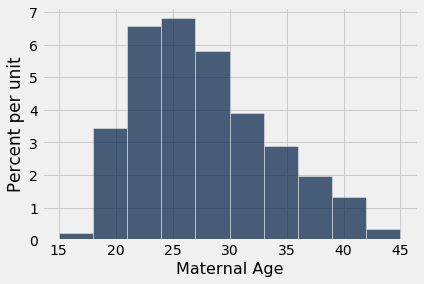

In [16]:
births.hist('Maternal Age')

In [17]:
sample_mean_age = np.mean(births.column('Maternal Age'))
sample_mean_age

27.228279386712096

In [23]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [24]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [27]:
print(left)
print(right)

26.895229982964224
27.574105621805792


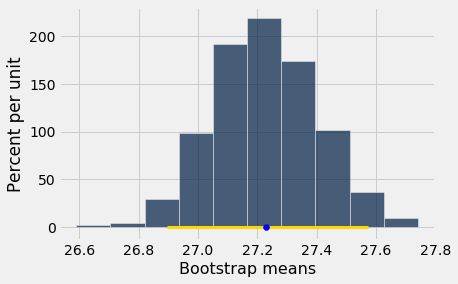

In [26]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(sample_mean_age,0,color="blue", zorder=2);